In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats, optimize

In [2]:
def damped_sin(t, a, om, phi, b):
    return a * np.sin(om*t + phi) * np.exp(-b * t)

a = 1
om = 1
phi = 0
b = 0.1

[ 0.80058886  1.01914012 -0.18501998  0.05255565]


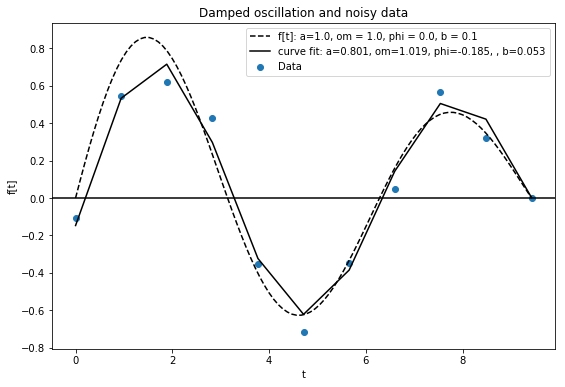

In [3]:
t = np.linspace(0,3*np.pi, 11)
ydata = damped_sin(t,a,om,phi,b) + 0.4*np.random.random(11) - 0.2

#Plot Raw Data
plt.figure(figsize=(9, 6))
plt.scatter(t, ydata, label='Data')

#Plot Function
x = np.linspace(0,3*np.pi,100)
plt.plot(x, damped_sin(x, a, om, phi, b), 'k--', label='f[t]: a=1.0, om = 1.0, phi = 0.0, b = 0.1')

#Plot curve fit
popt, pcov = optimize.curve_fit(damped_sin, t, ydata, p0 = [1,1,0,0.1])
print(popt)
plt.plot(t, damped_sin(t, *popt), 'k', label='curve fit: a=%5.3f, om=%5.3f, phi=%5.3f, , b=%5.3f' % tuple(popt))

plt.axhline(0, color = 'black')
plt.xlabel('t')
plt.ylabel('f[t]')
plt.title("Damped oscillation and noisy data")
plt.legend(loc = 'best')
plt.show()

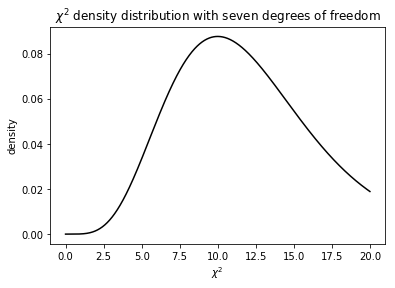

In [4]:
x2 = np.linspace(0,20,1000)
chi = stats.chi2.pdf(x2, 12)

plt.plot(x2, chi, 'k')
plt.xlabel("$\chi^2$")
plt.ylabel("density")
plt.title("$\chi^2$ density distribution with seven degrees of freedom")
plt.show()

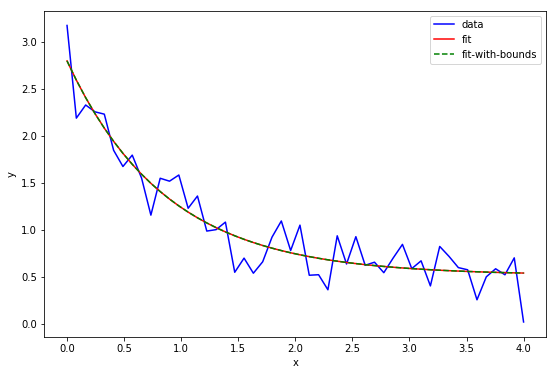

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

plt.figure(figsize = (9,6))
# define the data to be fit with some noise

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
y_noise = 0.2 * np.random.normal(size=xdata.size)
plt.plot(xdata, ydata, 'b-', label='data')

# Fit for the parameters a, b, c of the function `func`

popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit')

# Constrain the optimization to the region of ``0 < a < 3``, ``0 < b < 2``
# and ``0 < c < 1``:

popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 2., 1.]))
plt.plot(xdata, func(xdata, *popt), 'g--', label='fit-with-bounds')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()